In [54]:
pip install librosa


In [55]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving 7_george_0.wav to 7_george_0 (3).wav
User uploaded file "7_george_0.wav" with length 10306 bytes


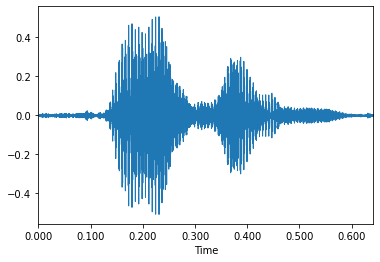

In [62]:
import librosa.display
import numpy as np
x, fs = librosa.load('7_george_0.wav')
librosa.display.waveplot(x, sr=fs)

In [63]:
import IPython.display as ipd
ipd.Audio('7_george_0.wav')

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

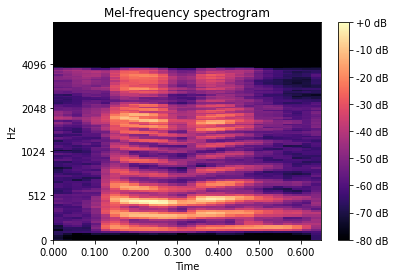

In [61]:
y, sr = librosa.load('7_george_0.wav')
librosa.feature.melspectrogram(y=y, sr=sr)
D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,fmax=8000)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',y_axis='mel', sr=sr,fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

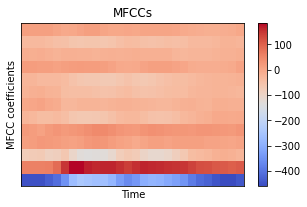

In [59]:
file=r'7_george_0.wav'
signal, sample_rate = librosa.load(file, sr=22050)
# STFT -> spectrogram
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
# display MFCCs
plt.figure(figsize=(5,3))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")
# show the plot
plt.show()